<a href="https://colab.research.google.com/github/adoleaa/coursera-test/blob/master/Introduction_to_Clustering_with_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clustering**
Welcome to the clustering notebook. 

The slides for this session are here: [slides](https://docs.google.com/presentation/d/15TJUlFksOLKpxzyCwZ_3rtrbUwFSJzTfQHE_fSN_ihg/edit#slide=id.g778de2130f_0_43) 

The package for kmeans clustering which we are using comes from sklearn and you can find it here: [sklearn clustering kmeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)

More information about clustering is available here: [Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html)

**import packages**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.data import iris_data
#from mlxtend.plotting import plot_decision_regions
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Link to the github repository where you can read more documentation [MLXTEND](https://github.com/rasbt/mlxtend)

# **K-Means clustering** 

How do we apply the k-means clustering to a dataset?

1. Understand your data. What do you actually want to cluster? Which variables do you want to use to create the cluster? 
2. Try out K-Means Cluster and visualize it
3. Use Elbow method to find optimal k.
4. Interpret the results


We use:
- scikit-learn K means


In [0]:
#@title Generate Data
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples = 300, n_features= 2, centers = 6, cluster_std=8, center_box = [0,100], random_state = 42)
df = pd.DataFrame(X, columns = ["number_of_visits","revenue"])
df.revenue = df.revenue.apply(lambda x: round(x, 2))
df.number_of_visits = df.number_of_visits.apply(int)
df.to_csv("webshop_example_clustering.csv",sep =";", index = False)

#### **1. Understand the data**

In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/juliandnl/redi_ss20/master/webshop_example_clustering(5).csv", sep =";")

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   number_of_visits  300 non-null    int64  
 1   revenue           300 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


In [0]:
df.shape

(300, 2)

#### **2. Try out K-Means Clustering** 

have a look at the scikit learn entry for Kmeans clustering: 

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [0]:
from sklearn.cluster import KMeans

In [0]:
kmeans = KMeans(n_clusters=4)

In [0]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
kmeans.fit(df[["number_of_visits","revenue"]])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
cluster = kmeans.predict(df[["number_of_visits","revenue"]])

In [0]:
df["cluster"] = cluster

In [0]:
kmeans.cluster_centers_

array([[ 3.61616162, 91.89010101],
       [66.88421053, 65.15494737],
       [16.24      , 15.3486    ],
       [36.41071429, 91.92125   ]])

In [0]:
df.head()

,number_of_visits,revenue,cluster
0,52,96.47,3
1,-9,106.14,0
2,39,79.39,3
3,71,65.58,1
4,26,96.65,3


#### **3. Visualize Clusters**

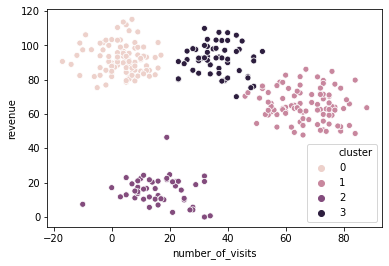

In [0]:
sns.scatterplot("number_of_visits","revenue", data = df, hue = "cluster") 

In [0]:
centroids = kmeans.cluster_centers_

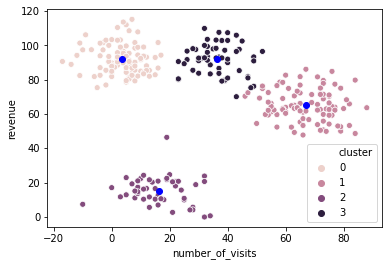

In [0]:
sns.scatterplot("number_of_visits","revenue", data = df, hue = "cluster")
# Add centroids to the plot:
plt.scatter(centroids[:,0], centroids[:,1], color = 'blue');

Let's try different amount of K

In [0]:
print(centroids[:,1])
print(centroids[:,0])
print(centroids[0,1])

91.890101010101


inertia is: 75922.02766535534


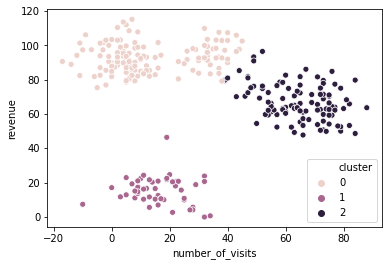

In [0]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df[["number_of_visits","revenue"]])
cluster = kmeans.predict(df[["number_of_visits","revenue"]])
df["cluster"] = cluster
sns.scatterplot("number_of_visits","revenue", data = df, hue = "cluster") 
print(f"inertia is: {kmeans.inertia_}")

#### **4. Elbow Method**

With the Elbow method you want to group clusters that minimizes the **inertia**. Inertia is calculated in K Means as such: "Sum of squared distances of samples to their closest cluster center." We could also use the maximum distance of two points part of the same cluster. You will try to find the number of clusters that has the biggest impast on dropping the inertia. It is also called the **Elbow Method** because you can easily visualise the drop of inertia by plotting the number of clusters associated to its intertia in a line plot as below.

In [0]:
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters
    print(k)
    kmeans = KMeans(n_clusters = k)
    # Fit model to samples
    kmeans.fit(df)
    # Append the inertia to the list of inertias
    inertias.append(kmeans.inertia_)

2
3
4


In [0]:
list_of_ks = [2,3,4]
ks = range(2,100)

In [0]:
ks = range(2,15)

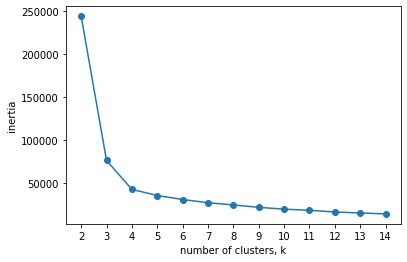

In [0]:
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters
    kmeans = KMeans(n_clusters = k)
    # Fit model to samples
    kmeans.fit(df)
    # Append the inertia to the list of inertias
    inertias.append(kmeans.inertia_)
  # Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [0]:
def plot_elbow_curve(ks, df):
  inertias = []
  for k in ks:
      # Create a KMeans instance with k clusters
      kmeans = KMeans(n_clusters = k)
      # Fit model to samples
      kmeans.fit(df)
      # Append the inertia to the list of inertias
      inertias.append(kmeans.inertia_)

  # Plot ks vs inertias
  plt.plot(ks, inertias, '-o')
  plt.xlabel('number of clusters, k')
  plt.ylabel('inertia')
  plt.xticks(ks)
  plt.show()

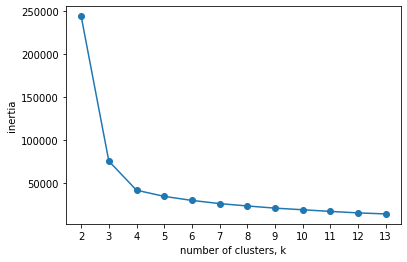

In [0]:
ks = range(2,14)
plot_elbow_curve(ks, df[["number_of_visits","revenue"]])

In this case, we see that the between 3 and 5 the drop in inertia becomes smaller by dividing clusters even more.

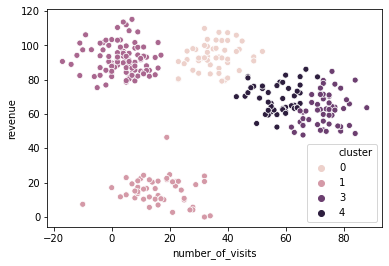

In [0]:
# lets try out new k's and visualize it:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(df[["number_of_visits","revenue"]])
df["cluster"] = kmeans.predict(df[["number_of_visits","revenue"]])
sns.scatterplot("number_of_visits","revenue", data = df, hue="cluster")

#### **5. Interpretation:**


We can see that 5 clusters worked best, but two cluster seem to be very close to each other. Depending on the business logical, we could hence, choose 4 or 5 clusters.

# **Customer Data Example**

In [0]:
customer = pd.read_csv("https://raw.githubusercontent.com/juliandnl/redi_ss20/master/Mall_Customers.csv")
customer.columns = ["id","gender","age","annual_income","spending_score"]

In [0]:
customer.head()

In [0]:
customer.shape

(200, 5)

In [0]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### **Exercise: Cluster the customers into different groups.**

Tasks:
1. Select two variables and plot the two variables in a scatter plot. Question: Could you see clusters in this visualization? If not try out two other 
variables! 
2. Try out kmeans clustering and select a number for k.
3. Run the elbow curve method and visualize it.
5. Interpret the result of the clustering. What kind of business logical could we derive from this?

**1. Visualize two variables**

**2. Apply K-Means Clustering.**
 
Select a number of clusters for k. Add the clusters to the customer dataset

**3. Visualize the clusters in a scatterplot**

**4. Run the elbow method and interpret it.**

**4. How many clusters would you select for targeting the customers?**

In [0]:
# type in your suggestion

# **Bonus or Homework**

There are more clustering techniques besides k-means clustering. Check out this video and learn about another clustering technique and differences to k-means clustering: 

https://www.youtube.com/watch?v=QXOkPvFM6NU